In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

[*********************100%***********************]  10 of 10 completed


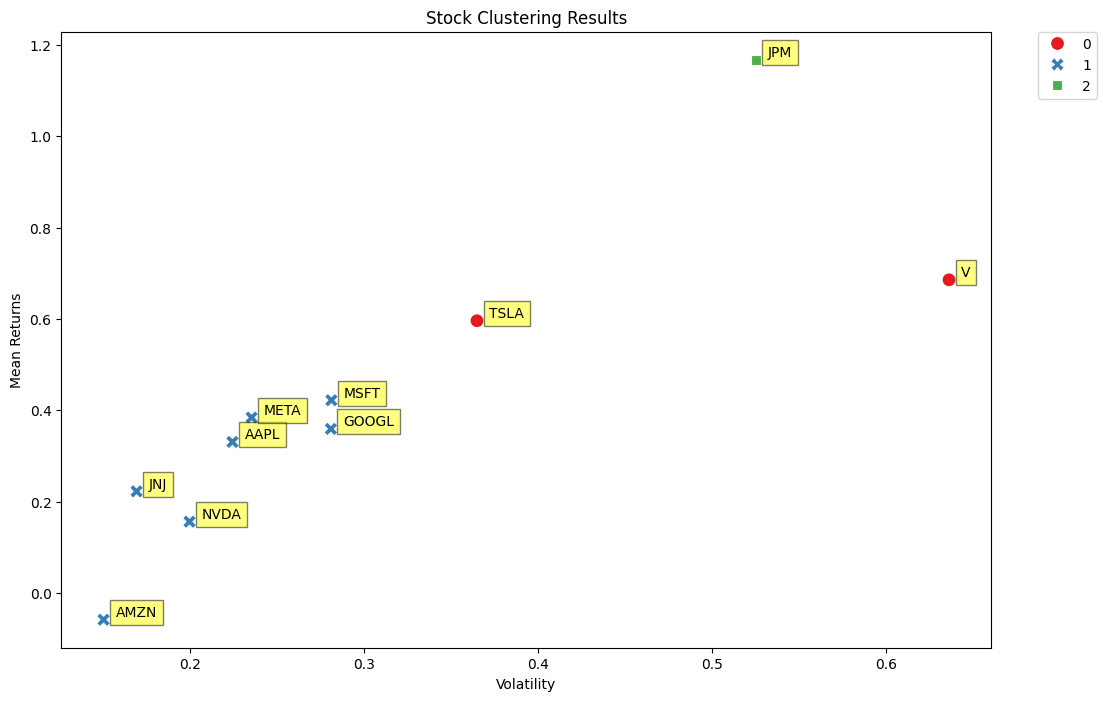

In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'JPM', 'V', 'JNJ']
data = yf.download(tickers, start='2024-01-01', end='2025-01-01', auto_adjust=False)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate mean returns and volatility
mean_returns = returns.mean() * 252
volatility = returns.std() * np.sqrt(252)

# Construct feature dataset and add stock tickers
features = pd.DataFrame({'Ticker': tickers, 'Mean Returns': mean_returns.values, 'Volatility': volatility.values})

# K-Means clustering
k = 3  # Assume 3 clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(features[['Mean Returns', 'Volatility']])
labels = kmeans.labels_

# Add cluster labels
features['Cluster'] = labels

# Visualize clustering results and annotate stock tickers
plt.figure(figsize=(12,8))
scatter = sns.scatterplot(x='Volatility', y='Mean Returns', data=features, hue='Cluster', style='Cluster', s=100, palette='Set1')

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Add stock ticker labels
for i in range(features.shape[0]):
    plt.text(x=features['Volatility'][i]+0.007, y=features['Mean Returns'][i]+0.007, 
             s=features['Ticker'][i], 
             fontdict=dict(color='black', size=10),
             bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='black'))

plt.title('Stock Clustering Results')
plt.xlabel('Volatility')
plt.ylabel('Mean Returns')
plt.show()

# PCA

In [7]:
X = returns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.decomposition import PCA

# 設置要保留的主成分數量
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 解釋方差比例
explained_variance = pca.explained_variance_ratio_
print('解釋方差比例：', explained_variance)

# 將主成分轉換為DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

解釋方差比例： [0.36481441 0.15383251]


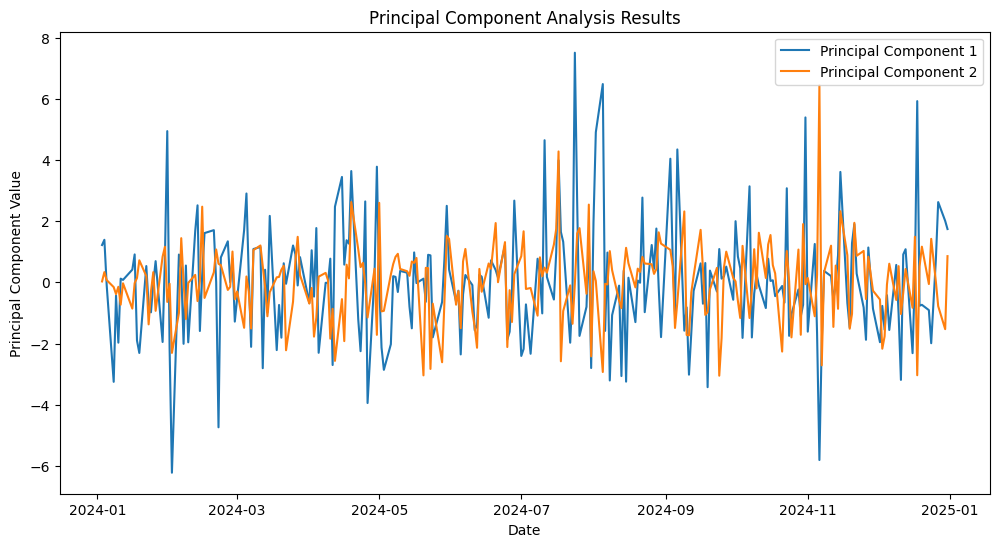

In [11]:
pca_df['Date'] = returns.index
pca_df.set_index('Date', inplace=True)

# Plot the principal components over time
plt.figure(figsize=(12,6))
plt.plot(pca_df.index, pca_df['PC1'], label='Principal Component 1')
plt.plot(pca_df.index, pca_df['PC2'], label='Principal Component 2')
plt.title('Principal Component Analysis Results')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()